# CL603 Project
## Implementation of real-valued genetic algorithm using decimal representation for genes
#### Team: Optimus
Atharva Kulkarni   -- 210070047  
Ayush Raj          -- 210100037  
Faizan Ansari      -- 210100058  
Rishit Shrivastava -- 210050136

In [26]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
from math import sin 

In [27]:
#test function
def func(x,y,z):
    return abs(x) + abs(y) + abs(z)

In [28]:
#some parameters which will be used later
best_gene=[]
best_gene_fitness=[]
max_gen=1000000
fitness_threshold=20000
mutation_prob=0.3

spread=10 #will be used for generating 1st generation and further for generating random number for mutation

### Fitness function
We define a function so that a smaller value of the function yields a higher fitness value, and to counter the function becoming zero, we arbitrarily assign a very large fitness value (assuming that the function we use minimizes to zero)

In [29]:
def fitness(x,y,z):
    if func(x,y,z)==0:
        result = 9999999
    else:
        result = abs(1/func(x,y,z))
    return result

### Generation
We will have "**n_chromosome**" number of chromosomes with 3 genes in each of them. Initially we will generate the 1st generation at random.

In [30]:
n_chromosomes = 16
n_genes = 3 #basically the number of variables
size = (n_chromosomes,n_genes)
gen = 1
generation=random.uniform(-spread,spread,size)
print(f"The 1st generation is as follows:")

for i in range(n_chromosomes):
    print(generation[i])

The 1st generation is as follows:
[ 6.34232363  3.80818677 -5.08913706]
[ 0.89203708 -4.2353973   5.95446155]
[-6.50848774  8.03605939 -8.86954675]
[ 2.6454877  -8.25483647 -1.89637359]
[-6.91420498  1.92791027  2.68088078]
[ 8.17122625 -6.50645504 -0.75281827]
[ 1.91001492 -2.56013858  4.91729524]
[ 5.29476049  9.05560742 -2.86228464]
[-9.85626615  0.62476106 -0.59436094]
[-9.50183489  1.55844597 -2.10546388]
[ 4.30145071 -2.52889339 -1.36207139]
[-5.10001701  7.55746452  2.76665221]
[ 2.25437291 -2.44723616  9.89098796]
[ 6.17951635 -4.90469312  5.46385776]
[ 5.72387841  8.09415363 -7.99180897]
[-6.6881642   1.91472555 -4.67473674]


### Ranking
Now we will rank the chromosomes in descending order based on their fitness.

In [31]:
ranked_generation = []
for i in generation:
    ranked_generation.append( (fitness(i[0],i[1],i[2]), i) )
ranked_generation.sort(reverse=True)

best_gene.append(ranked_generation[0][1])
best_gene_fitness.append(ranked_generation[0][0])

print(f"The 1st generation after sorting by their fitness is as follows:")
for i in range(n_chromosomes):
    print(f"Rank {i+1}: {ranked_generation[i][1]} , fitness = {ranked_generation[i][0]}")

The 1st generation after sorting by their fitness is as follows:
Rank 1: [ 4.30145071 -2.52889339 -1.36207139] , fitness = 0.12206412151237703
Rank 2: [ 1.91001492 -2.56013858  4.91729524] , fitness = 0.10652521551949816
Rank 3: [-9.85626615  0.62476106 -0.59436094] , fitness = 0.09029028923421999
Rank 4: [ 0.89203708 -4.2353973   5.95446155] , fitness = 0.09023726681948986
Rank 5: [-6.91420498  1.92791027  2.68088078] , fitness = 0.08678298568920154
Rank 6: [ 2.6454877  -8.25483647 -1.89637359] , fitness = 0.07814516049735386
Rank 7: [-9.50183489  1.55844597 -2.10546388] , fitness = 0.0759546854098309
Rank 8: [-6.6881642   1.91472555 -4.67473674] , fitness = 0.07531466568357771
Rank 9: [ 2.25437291 -2.44723616  9.89098796] , fitness = 0.06852789798885787
Rank 10: [ 6.34232363  3.80818677 -5.08913706] , fitness = 0.06561831579306604
Rank 11: [-5.10001701  7.55746452  2.76665221] , fitness = 0.06483346271455384
Rank 12: [ 8.17122625 -6.50645504 -0.75281827] , fitness = 0.064806715822394

### Selection
Now, we will select top "**n_chromosomes/2**" fitness chromosomes from this generation for further mating

In [32]:
parents = ranked_generation[:int(n_chromosomes/2)]
parent_chromosomes=[]

print(f"The selected parent chromosomes are as follows:")

k=0
for i in parents:
    parent_chromosomes.append(list(i[1]))
    print(parent_chromosomes[k])
    k+=1

The selected parent chromosomes are as follows:
[4.301450707905339, -2.528893390254783, -1.3620713930585833]
[1.9100149177578736, -2.560138581467326, 4.917295238834026]
[-9.85626615385228, 0.6247610594656265, -0.5943609428316741]
[0.8920370820011385, -4.235397298421608, 5.954461550671827]
[-6.914204982061792, 1.9279102684874534, 2.680880784426199]
[2.6454877013961724, -8.254836469826827, -1.8963735850489556]
[-9.501834885860363, 1.558445970363504, -2.1054638849237133]
[-6.688164202822668, 1.9147255498770193, -4.674736735099341]


### Mating
For the mating process, we will use fixed point crossover, where basically (assuming the fixed point is "**n**"), the first n genes are from parent 1 and remaining from parent 2

In [33]:
def mating(parents,crossover_point):
    offsprings=[]
    
    #we will be mating parent i with i+1 and we will go through this in a circular manner, so that in the end,
    #last index parent is mated with 0th
    for i in range(len(parents)-1):
        child_chromosome=list(parents[i][:crossover_point])+list(parents[i+1][crossover_point:])
        offsprings.append(child_chromosome)

    child_chromosome=list(parents[len(parents)-1][:crossover_point])+list(parents[0][crossover_point:])
    offsprings.append(child_chromosome)

    return offsprings

In [34]:
offsprings = mating(parent_chromosomes,int(n_genes/2))

print(f"The  offsprings are as follows:")
for i in offsprings:
    print(i)

The  offsprings are as follows:
[4.301450707905339, -2.560138581467326, 4.917295238834026]
[1.9100149177578736, 0.6247610594656265, -0.5943609428316741]
[-9.85626615385228, -4.235397298421608, 5.954461550671827]
[0.8920370820011385, 1.9279102684874534, 2.680880784426199]
[-6.914204982061792, -8.254836469826827, -1.8963735850489556]
[2.6454877013961724, 1.558445970363504, -2.1054638849237133]
[-9.501834885860363, 1.9147255498770193, -4.674736735099341]
[-6.688164202822668, -2.528893390254783, -1.3620713930585833]


### Mutation
For mutation, we had already defined a mutation probablity, so we will generate a random number between 0 and 1, and if this number is less than mutation probablity, then we will randomly change one of the gene of the chromosome, to a random number. This process will be repeated for all the chromosomes

In [35]:
print(f"Mutated offsprings are as follows:")
for i in offsprings:
    chance = random.rand()
    if chance<mutation_prob:
        index=random.randint(0,n_genes)
        i[index]=random.uniform(-spread,spread)
    print(i)

generation=parent_chromosomes+offsprings
gen+=1

Mutated offsprings are as follows:
[4.301450707905339, -2.560138581467326, 4.917295238834026]
[1.9100149177578736, 0.6247610594656265, -0.5943609428316741]
[-0.2947352916686281, -4.235397298421608, 5.954461550671827]
[1.4735211216519737, 1.9279102684874534, 2.680880784426199]
[-6.914204982061792, -8.254836469826827, -1.8963735850489556]
[2.6454877013961724, 1.558445970363504, -2.1054638849237133]
[-9.501834885860363, 1.9147255498770193, -4.674736735099341]
[-6.688164202822668, -2.528893390254783, 4.038566616882697]


#### Moving Further
We will repeat the same process above for some "**max_gen**" number of generations, and we will also put a fitness threshold, so that if we find a chromosome with a fitness higher than the threshold, we stop the iterations and declare that chromosome as the answer

In [36]:
while gen<max_gen:
    
    #Ranking process
    ranked_generation = []
    for i in generation:
        ranked_generation.append( (fitness(i[0],i[1],i[2]), i) )
    ranked_generation.sort(reverse=True)
    best_gene.append(ranked_generation[0][1])
    best_gene_fitness.append(ranked_generation[0][0])

    #checking for fitness threshold
    if ranked_generation[0][0]>fitness_threshold:
        gen+=1
        break

    #Selection process
    parents = ranked_generation[:8]
    parent_chromosomes=[]
    for i in parents:
        parent_chromosomes.append(list(i[1]))

    #Mating process
    offsprings = mating(parent_chromosomes,int(n_genes/2))
    
    #Mutation process
    for i in offsprings:
        chance = random.rand()
        if chance< mutation_prob:
            index=random.randint(0,n_genes)
            i[index]=random.uniform(-spread,spread)
    
    generation=parent_chromosomes+offsprings

    gen+=1
result_gen=gen-1
print(f"The fittest gene is: {ranked_generation[0][1]} ,\nin the generation {result_gen} , with a fitness of {ranked_generation[0][0]}")
print(f"The function value at this chromosome is : {func(ranked_generation[0][1][0],ranked_generation[0][1][1],ranked_generation[0][1][2])}")

The fittest gene is: [-3.024220188230231e-05, -8.218839939289069e-06, 3.0015865403854036e-05] ,
in the generation 999999 , with a fitness of 14603.463277155846
The function value at this chromosome is : 6.847690722544542e-05


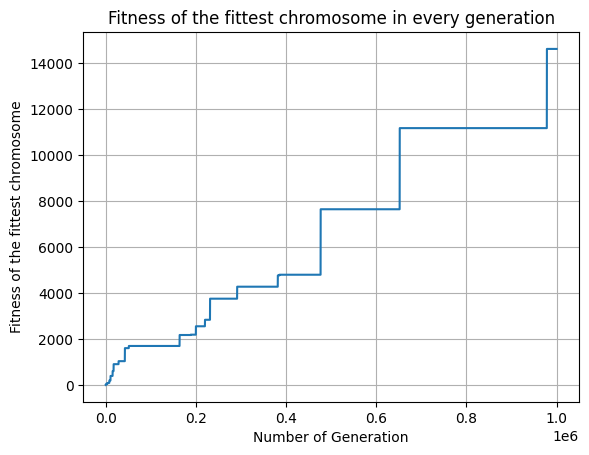

In [37]:
plt.plot(np.linspace(1,result_gen,result_gen),best_gene_fitness)
plt.xlabel("Number of Generation")
plt.ylabel("Fitness of the fittest chromosome")
plt.title("Fitness of the fittest chromosome in every generation")
plt.grid()
plt.show()